##Library Imports

In [0]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn import svm
import seaborn as sn

##Loading datasets

In [2]:
# Import the datasets
data_train = pd.read_csv('train.csv', header=None)
data_test = pd.read_csv('test.csv', header=None)

# Store the unprocessed features in arrays
ini_train = np.array(data_train.iloc[1:,:11])
ini_test = np.array(data_test.iloc[1:,:11])

# Store classes in arrays
y_train = np.array(data_train.iloc[1:,11])
y_test = np.array(data_test.iloc[1:,11])

# Take a look at the data
data_train

,0,1,2,3,4,5,6,7,8,9,10,11
0,profile pic,nums/length username,fullname words,nums/length fullname,name==username,description length,external URL,private,#posts,#followers,#follows,fake
1,1,0.27,0,0,0,53,0,0,32,1000,955,0
2,1,0,2,0,0,44,0,0,286,2740,533,0
3,1,0.1,2,0,0,0,0,1,13,159,98,0
4,1,0,1,0,0,82,0,0,679,414,651,0
...,...,...,...,...,...,...,...,...,...,...,...,...
572,1,0.55,1,0.44,0,0,0,0,33,166,596,1
573,1,0.38,1,0.33,0,21,0,0,44,66,75,1
574,1,0.57,2,0.0,0,0,0,0,4,96,339,1
575,1,0.57,1,0.0,0,11,0,0,0,57,73,1


## Preprocessing

In [0]:
scaler = StandardScaler()

def preprocess(ar, stand):
    new_data = np.zeros(11)
    new_data = np.reshape(new_data, (1, 11))
    
    for line in ar:
        new_line = line[0:11]
        new_line = np.reshape(new_line, (1, 11))
        new_data = np.append(new_data, new_line, axis=0)
    
    new_data = new_data[1:]
    
    if stand:
      new_data = scaler.fit_transform(new_data)
            
    return new_data

In [0]:
# Preprocess the training and testing datasets
tmp = preprocess(ini_train, False)
X_train = preprocess(ini_train, True)
X_test = preprocess(ini_test, True)

Let's visualize the data. (0 real, 1 fake)

#follows


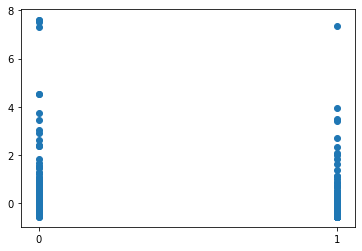

In [31]:
see = 10
plot_x = np.zeros(len(X_train))
print(data_train[see][0])
for i in range(len(X_train)):
  plot_x[i] = X_train[i][see]

plt.scatter(y_train,plot_x)

##SVM Model

SVC performs better than LinearSVC

In [10]:
svm_clf = svm.SVC(max_iter=1500)
svm_clf.fit(X_train, y_train)

print(svm_clf.score(X_train, y_train))
print(svm_clf.score(X_test, y_test)) 

0.9166666666666666
0.8833333333333333


Small test

In [11]:
test = [[0, 0.9, 2, 0.4, 1, 5, 0, 0, 33, 142, 1000]] # This should be fake:1 (using graph data)
test2 = [[1, 0, 1, 0, 0, 30, 0, 0, 36, 473, 472]] # This should be real:0 (personal account data)
test = scaler.transform(test)
test2 = scaler.transform(test2)

pred = svm_clf.predict(test)
pred2 = svm_clf.predict(test2)
print(pred, pred2)

['1'] ['0']


Confusion Matrix: www.dataschool.io/simple-guide-to-confusion-matrix-terminology/

In [79]:
test_pred = svm_clf.predict(X_test)

data = {'y_actual': y_test.astype(float), 'y_pred': test_pred.astype(float)}
df = pd.DataFrame(data, columns=['y_actual','y_pred'])

confusion_matrix = pd.crosstab(df['y_actual'], df['y_pred'], rownames=['Actual'], colnames=['Predicted'])
print (confusion_matrix)

Predicted  0.0  1.0
Actual             
0.0         54    6
1.0          8   52


*   True Negative: 54
*   False Negative: 8
*   True Positive: 52
*   False Positive: 6

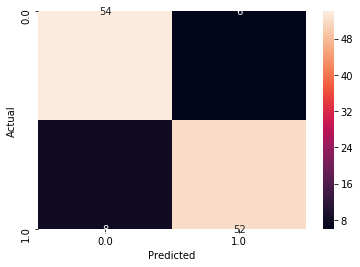

In [83]:
sn.heatmap(confusion_matrix, annot=True)
# Why are the numbers displayed in the borders

Correlation Matrix (higher the value, higher the correlation)

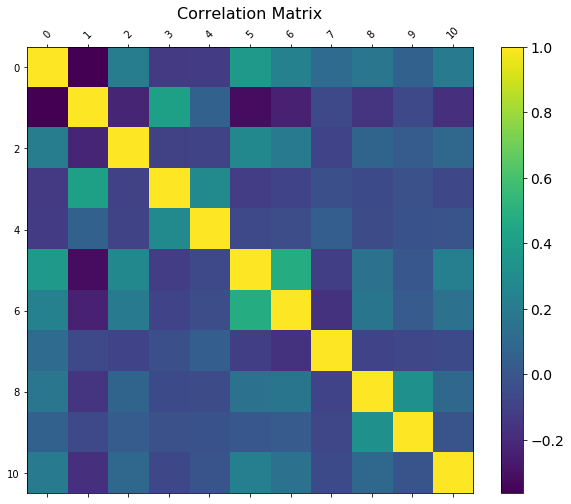

In [64]:
tmp = data_train.iloc[1:,:11]
corr = tmp.astype(float).corr()

f = plt.figure(figsize=(10,8))
plt.matshow(corr, fignum=f.number)
plt.xticks(range(tmp.shape[1]), tmp.columns, rotation=45)
# plt.yticks(range(tmp.shape[1]), tmp.columns, fontsize=14)
cb = plt.colorbar()
cb.ax.tick_params(labelsize=14)
plt.title('Correlation Matrix', fontsize=16);
plt.show()